In [76]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [28]:
avocado_mean = pd.read_csv("C:/Users/bkunt/jupyter/karpov/data/avocado_mean.csv", index_col=0, parse_dates=['Date'])

In [29]:
avocado_mean.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


In [30]:
#посчитаем скользящее среднее цены авокадо с окном, равным 3 и найдем максимальное значение
avocado_mean.AveragePrice.rolling(3).mean().max()

1.8493209876543208

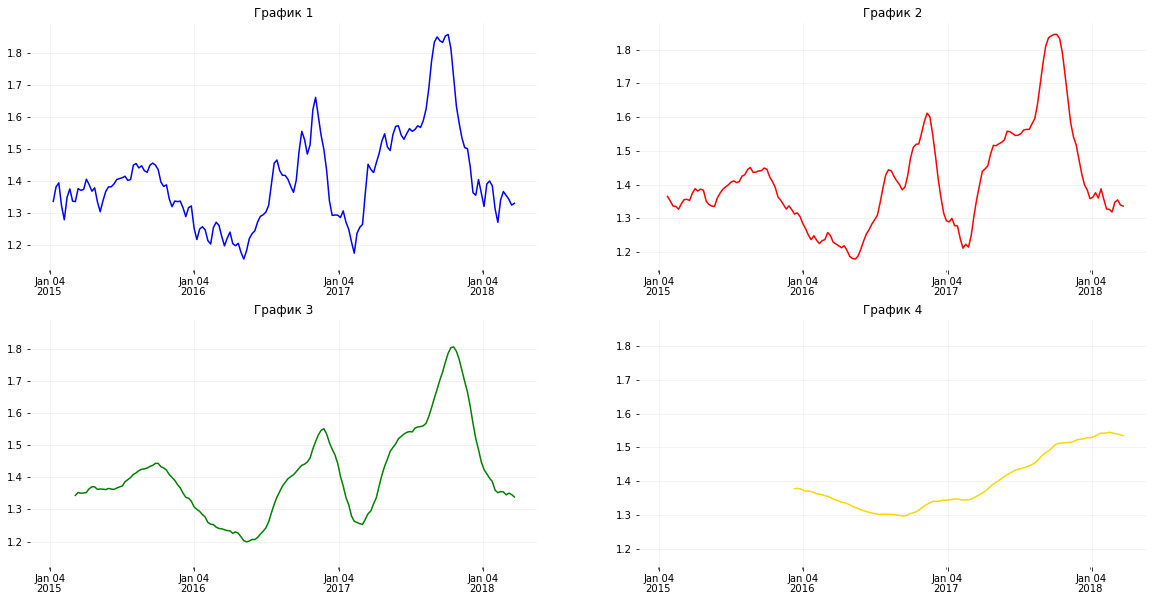

In [31]:
#разобьём общее полотно графика на 4 части
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)

#создадим шаблоны для применения в качестве параметров при построении графиков
windows = [2, 4, 10, 50]
colors = ['blue', 'red', 'green', 'gold']

#для отрисовки графиков используем цикл, соединив разные переменные через zip
for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)

#исправим каждый график через цикл
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # устанавливаем major locator – 4 января для каждого года
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))  
    # показывать в формате сокращенного названия месяца и дня (Jan 04)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)

#добавим названия
for name, ax in zip(['1','2','3','4'], axes.flatten()):
    ax.set(title='График {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
    
plt.show()

In [32]:
#высчитаем экспоненциальное скользящее среднее
avocado_ewm = avocado_mean.ewm(span=2).mean()

In [33]:
avocado_full = pd.read_csv("C:/Users/bkunt/jupyter/karpov/data/avocado_full.csv", index_col=0, parse_dates=['Date'])

In [34]:
avocado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [35]:
#отфильтруем данные по необходимым условиям
chicago_organic_avocado = avocado_full.query('type == "organic" and region == "Chicago"')

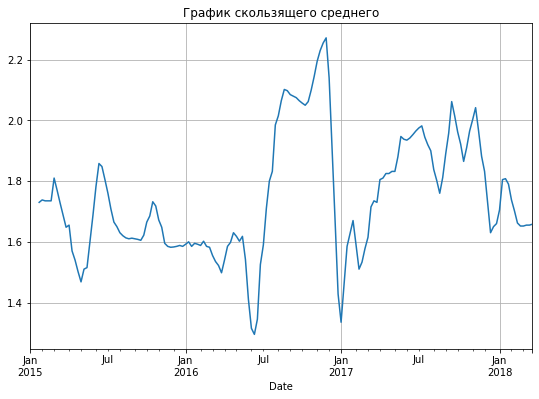

In [36]:
#построим график скользящего среднего с окном 4
plt.figure(figsize=(9, 6))
chicago_organic_avocado.AveragePrice.rolling(4).mean().round(3).plot()
plt.grid()
plt.title("График скользящего среднего")
plt.show()

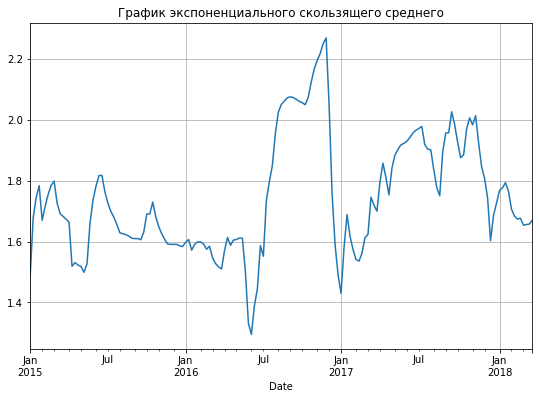

In [37]:
#построим график экспоненциального скользящего среднего с параметром span=4
plt.figure(figsize=(9, 6))
chicago_organic_avocado.AveragePrice.ewm(span=4).mean().round(3).plot()
plt.grid()
plt.title("График экспоненциального скользящего среднего")
plt.show()

In [38]:
df = pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/delays.csv')

In [39]:
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [40]:
#переведем колонку delay в формат timedelta
df['delay'] = pd.to_timedelta(df.delay.str.replace('-', ''))

In [43]:
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


In [50]:
#разобъем колонку delay на категории
df['delay_categorical'] = pd.cut(df.delay, \
                                 bins=pd.to_timedelta(['0d', '1d', '2d', '3d', '5d']), \
                                 labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])

In [51]:
df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


In [75]:
#построим барплот частоты опозданий в зависимости от категорий
how_long_and_often = df.groupby('delay_categorical', as_index=False) \
                       .agg({'delay': 'count'}) \
                       .rename(columns={'delay_categorical': 'how_long', 'delay': 'how_often'}) \
                       .sort_values('how_often', ascending=False)

plt.figure(figsize=(9, 6))
px.bar(x=how_long_and_often.how_long, y=how_long_and_often.how_often)

<Figure size 648x432 with 0 Axes>